In [6]:
from functions import *
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import shap
from sklearn.model_selection import train_test_split
from collections import Counter

## Data Preprocessing

In [7]:
path_1 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Processed Data/Merged/THL1_merged.csv"
path_2 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Processed Data/Merged/THL2_merged.csv"
path_3 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Processed Data/Merged/THLs3_merged.csv"

THL_1 = pd.read_csv(path_1, sep=',')
THL_2 = pd.read_csv(path_2, sep=',')
THL_3 = pd.read_csv(path_3, sep=',')


In [8]:
## set modules
module1 = ['M01_1_N', 'M02_1_N', 'M03_1_N', 'M04_1_N', 'M05_1_N', 'M06_1_N']

module2 = [
            'M01_2_N', 'M02_2_N', 'M03_2_N', 'M04_2_N', 'M05_2_N', 'M06_2_N',
            'M07_2_N', 'M08_2_N', 'M09_2_N', 'M10_2_N', 'M11_2_N', 'M12_2_N',]

module3 = ['M01_3_N', 'M02_3_N', 'M03_3_N', 'M04_3_N', 'M05_3_N', 'M06_3_N',
            'M07_3_N', 'M08_3_N', 'M09_3_N', 'M10_3_N', 'M11_3_N', 'M12_3_N',
            'M13_3_N', 'M14_3_N', 'M15_3_N', 'M16_3_N', 'M17_3_N']

### Train test split function

### Search Space / Param Grid 

In [9]:
from hyperopt import *
search_space = {
    'criterion': hp.choice('criterion', ['entropy']),           # Choose between Gini & Entropy
    'max_depth': hp.choice('max_depth', list(range(4, 20))),   # Either unlimited or between 3-20
    'max_features': hp.choice('max_features', ['sqrt', 'log2']),  # Feature selection method
    'class_weight': 'balanced',       # Handle class imbalance
    'ccp_alpha': hp.uniform('ccp_alpha', 0.01, 0.02),  # Regularization term (log scale, ~exp(-5) to exp(0)),
}

## BHT semester 1

In [10]:
# Count occurrences of each unique value in the 'status' column
counter_1 = Counter(THL_1['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_1[1]} | 0: {counter_1[0]}')
hpo = ModelTrainer(random_state=42)
x, y = hpo.split_data(THL_1, module1)

Quantity of Drop Out and Degree in THL-1: 
 1: 502 | 0: 118


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 69.00trial/s, best loss: -0.7896580571799869]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            21               02
	 actual 1            45               56

Model parameters:
{'ccp_alpha': 0.016773858179297906, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 17, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Balanced acc.: 73.37495%
Validation accuracy.: 62.09677%
Sensitivity score (for 1): 55.44554%
Specificity score (for 0): 91.30435%
F1 score.: 70.44025%
False prediction: 37.90323%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 65.11trial/s,

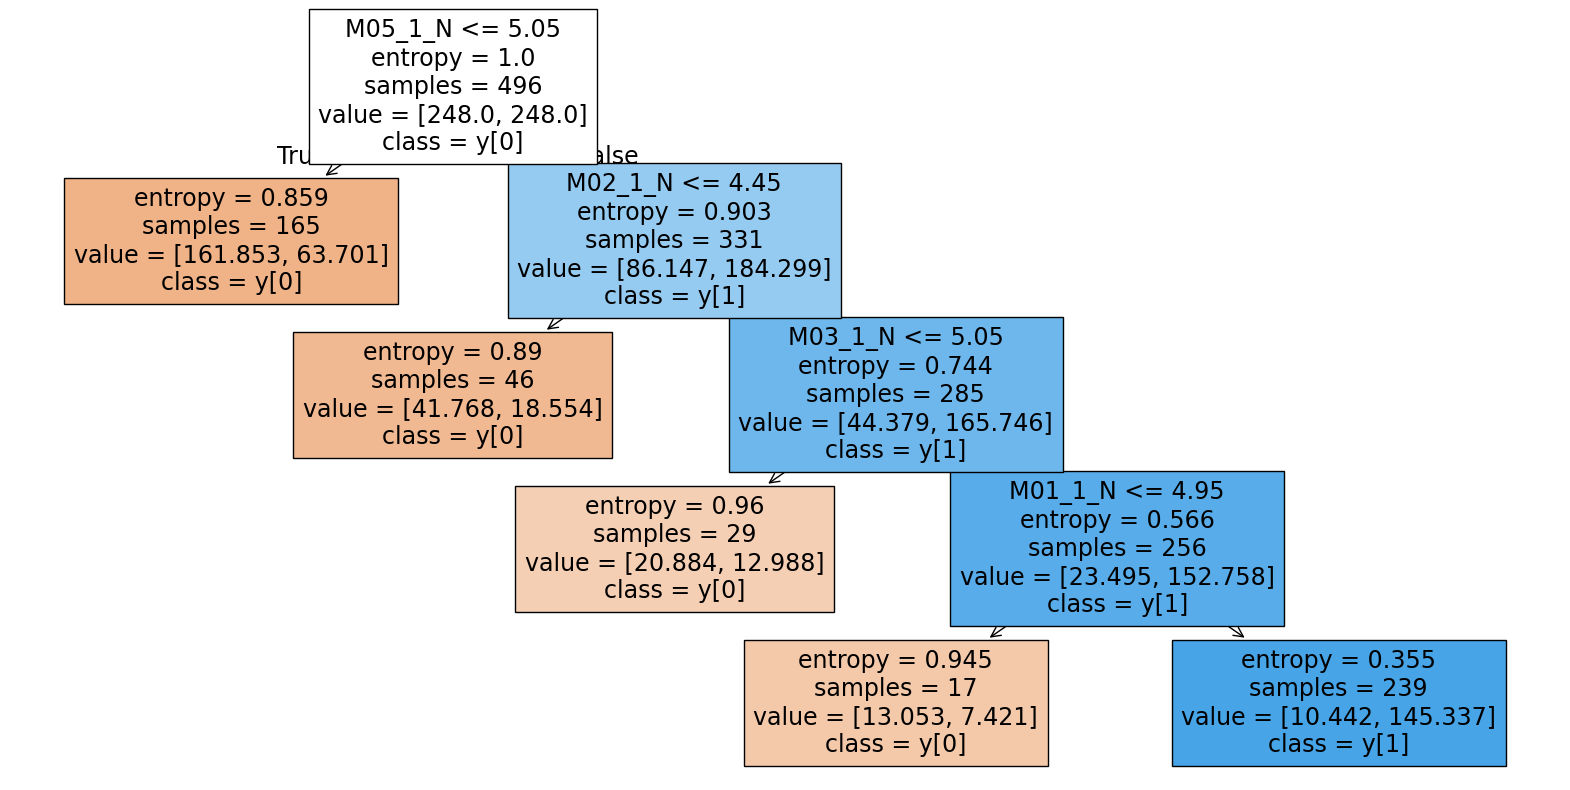

best model is from 2 fold: DecisionTreeClassifier(ccp_alpha=0.017937619364524333, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features='sqrt',
                       random_state=42)


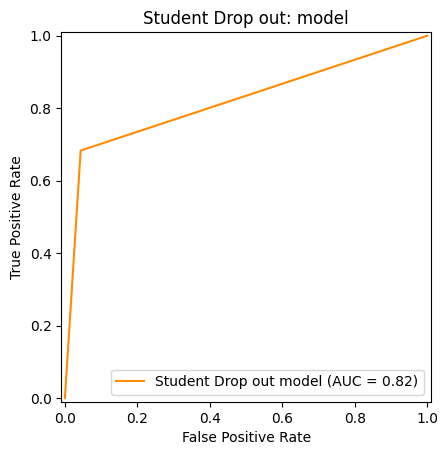

In [11]:
hpo = ModelTrainer(random_state=42)
models_1, feature_importance_1 = hpo.cross_validation_hpo(x=x, y=y, search_space=search_space, folds=5, algo='dt')

In [12]:
feature_importance_1

,Feature,Importance
4,M05_1_N,0.411094
1,M02_1_N,0.241477
0,M01_1_N,0.178340
2,M03_1_N,0.169089
3,M04_1_N,0.000000
5,M06_1_N,0.000000


#### Shap analysis

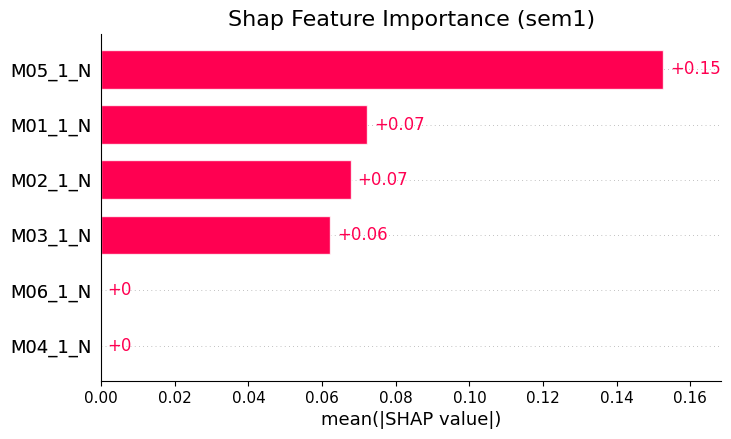

In [13]:
## Shap Global explainations
import shap
explainer = shap.TreeExplainer(models_1['model'], models_1['x_train'])
shap_values = explainer(models_1['x_test'])

plt.title('Shap Feature Importance (sem1)', fontsize=16)
shap.plots.bar(shap_values[...,1])

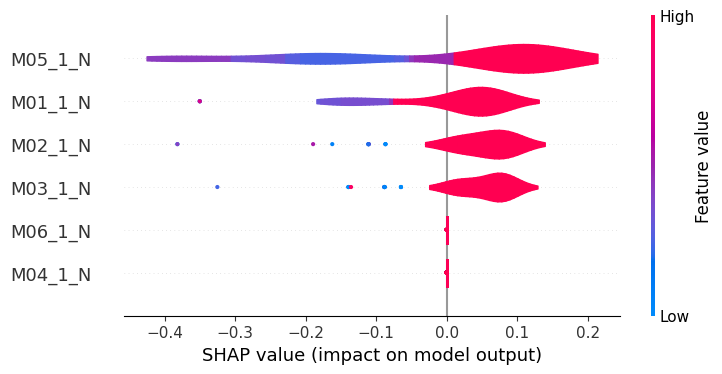

In [14]:
shap.plots.violin(shap_values[...,1], show=True)

In [15]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values[...,1], link='identity')

In [16]:
hpo.plot_shap_force(model=models_1, shap_values=shap_values, student_index=11, link='logit', model_name='dt') 

Student index 11 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.067, Probability [1]: 0.933


In [17]:
hpo.plot_shap_force(model=models_1, 
           shap_values=shap_values, 
           student_index=24, model_name='dt', link='logit')

Student index 24 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.067, Probability [1]: 0.933


In [18]:
hpo.plot_shap_force(model=models_1, 
           shap_values=shap_values, 
           student_index=10, model_name='dt', link='logit')

Student index 10 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.067, Probability [1]: 0.933


## THL semester 2 

In [19]:
# Count occurrences of each unique value in the 'status' column
counter_2 = Counter(THL_2['status'])
print(f'Quantity of Drop Out and Degree in THL-2: \n 1: {counter_2[1]} | 0: {counter_2[0]}')

hpo2 = ModelTrainer(random_state=42)
x, y = hpo2.split_data(THL_2, module2)

Quantity of Drop Out and Degree in THL-2: 
 1: 315 | 0: 88


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 61.02trial/s, best loss: -0.7210084033613445]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            17               01
	 actual 1            33               30

Model parameters:
{'ccp_alpha': 0.014320607124500038, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Balanced acc.: 71.03175%
Validation accuracy.: 58.02469%
Sensitivity score (for 1): 47.61905%
Specificity score (for 0): 94.44444%
F1 score.: 63.82979%
False prediction: 41.97531%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 71.91trial/s, 

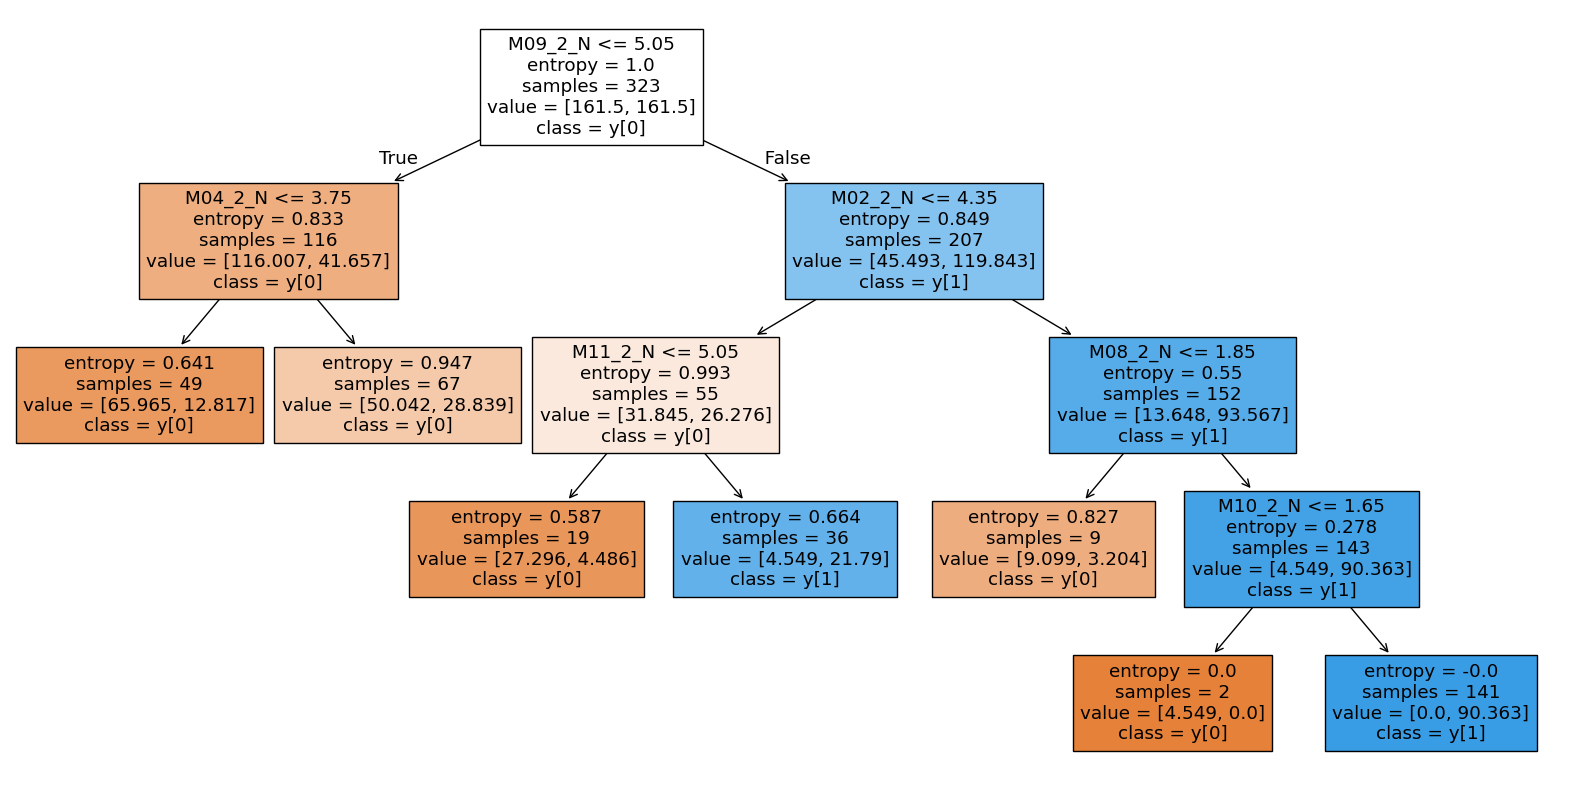

best model is from 4 fold: DecisionTreeClassifier(ccp_alpha=0.016302976400648896, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features='log2',
                       random_state=42)


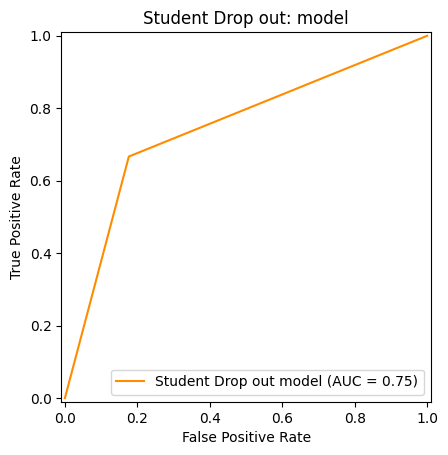

In [20]:
hpo2 = ModelTrainer(random_state=42)
models_2, feature_importance_2 = hpo2.cross_validation_hpo(x=x, y=y, search_space=search_space, folds=5, algo='dt')

In [21]:
feature_importance_2

,Feature,Importance
8,M09_2_N,0.338864
9,M10_2_N,0.173908
1,M02_2_N,0.156006
7,M08_2_N,0.148165
10,M11_2_N,0.142501
3,M04_2_N,0.040556
0,M01_2_N,0.000000
2,M03_2_N,0.000000
4,M05_2_N,0.000000
5,M06_2_N,0.000000


#### Shap analysis

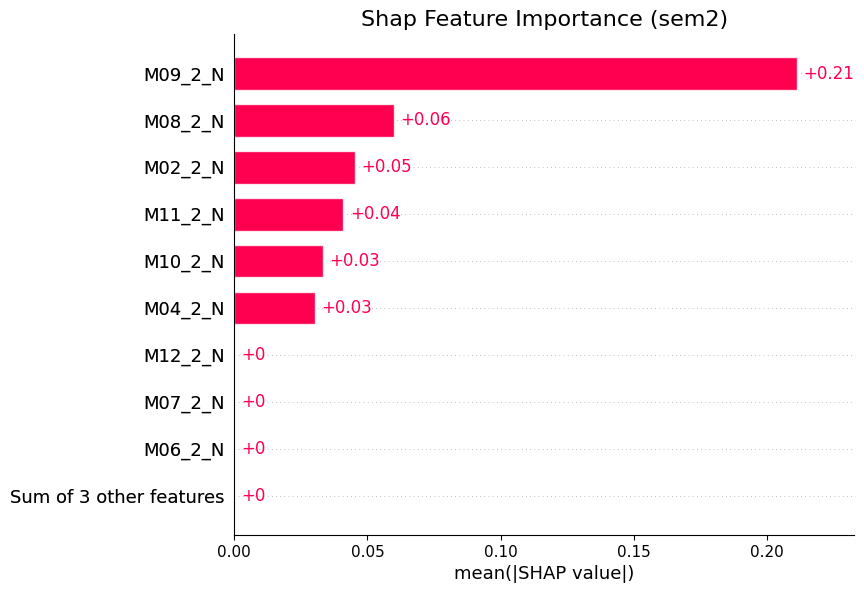

In [22]:
## Shap Global explainations
import shap
explainer2 = shap.TreeExplainer(models_2['model'], models_2['x_train'])
shap_values2 = explainer2(models_2['x_test'])

plt.title('Shap Feature Importance (sem2)', fontsize=16)
shap.plots.bar(shap_values2[...,1])

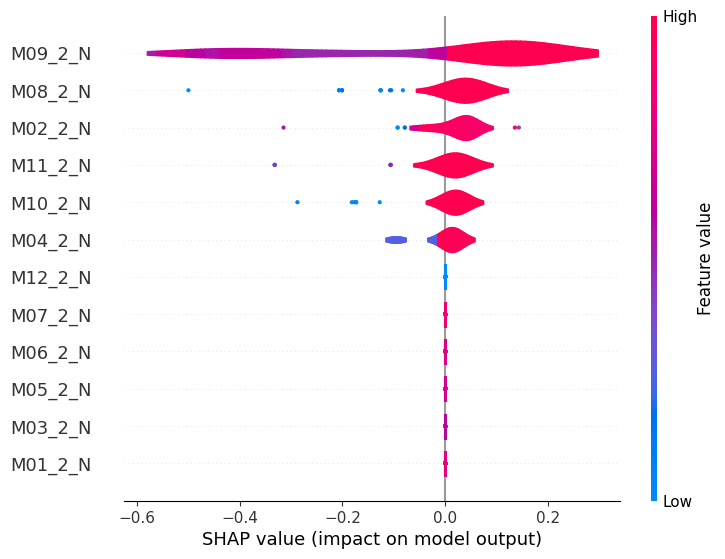

In [23]:
shap.plots.violin(shap_values2[...,1], show=True)

In [24]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values2[...,1], link='identity')

In [25]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=33, link='logit', model_name='dt')

Student index 33 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.000, Probability [1]: 1.000


In [26]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=11, link='logit', model_name='dt')

Student index 11 grades:
         grades
M01_2_N     5.1
M02_2_N     1.7
M03_2_N     1.3
M04_2_N     1.3
M05_2_N     1.7
M06_2_N     5.1
M07_2_N     2.3
M08_2_N     1.7
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     4.0
M12_2_N     5.1
Status: 0, Prediction: [0], Probability [0]: 0.859, Probability [1]: 0.141


In [27]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=2, link='logit',model_name='dt')

Student index 2 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     2.0
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.000, Probability [1]: 1.000


In [28]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=5, link='logit', model_name='dt')

Student index 5 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.000, Probability [1]: 1.000


## BHT semester 3

In [29]:
# Count occurrences of each unique value in the 'status' column
counter_3 = Counter(THL_3['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_3[1]} | 0: {counter_3[0]}')
hpo3 = ModelTrainer(random_state=42)
x, y = hpo3.split_data(THL_3, module3)

Quantity of Drop Out and Degree in THL-1: 
 1: 203 | 0: 85


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 73.42trial/s, best loss: -0.7229967948717949]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            13               04
	 actual 1            08               33

Model parameters:
{'ccp_alpha': 0.019541005462486175, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}

Balanced acc.: 78.47920%
Validation accuracy.: 79.31034%
Sensitivity score (for 1): 80.48780%
Specificity score (for 0): 76.47059%
F1 score.: 84.61538%
False prediction: 20.68966%

------------------------------------- Fold 2 --------------------------------------------------
100%|██████████| 10/10 [00:00<00:00, 66.79trial/s,

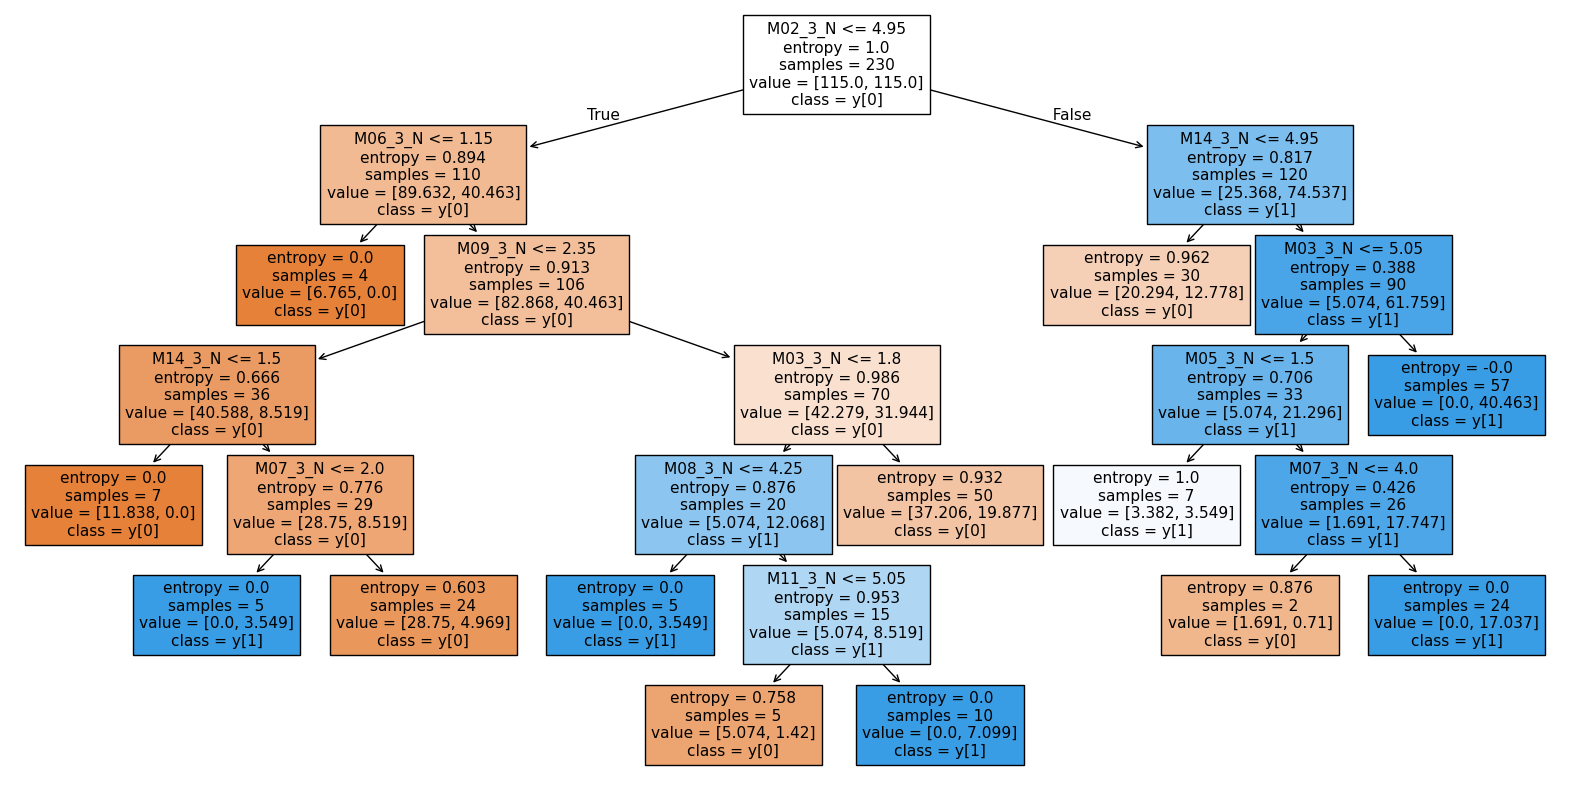

best model is from 1 fold: DecisionTreeClassifier(ccp_alpha=0.019541005462486175, class_weight='balanced',
                       criterion='entropy', max_depth=12, max_features='sqrt',
                       random_state=42)


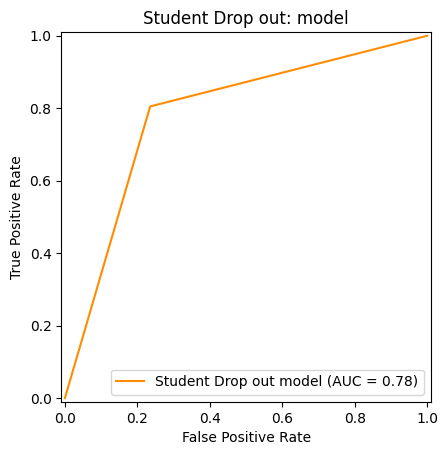

In [30]:
hpo3 = ModelTrainer(random_state=42)
models_3, feature_importance_3 = hpo3.cross_validation_hpo(x=x, y=y, search_space=search_space, folds=5, algo='dt')


In [31]:
feature_importance_3

,Feature,Importance
1,M02_3_N,0.289046
13,M14_3_N,0.250452
6,M07_3_N,0.133276
2,M03_3_N,0.110347
10,M11_3_N,0.072618
8,M09_3_N,0.060810
5,M06_3_N,0.033940
4,M05_3_N,0.030838
7,M08_3_N,0.018672
12,M13_3_N,0.000000


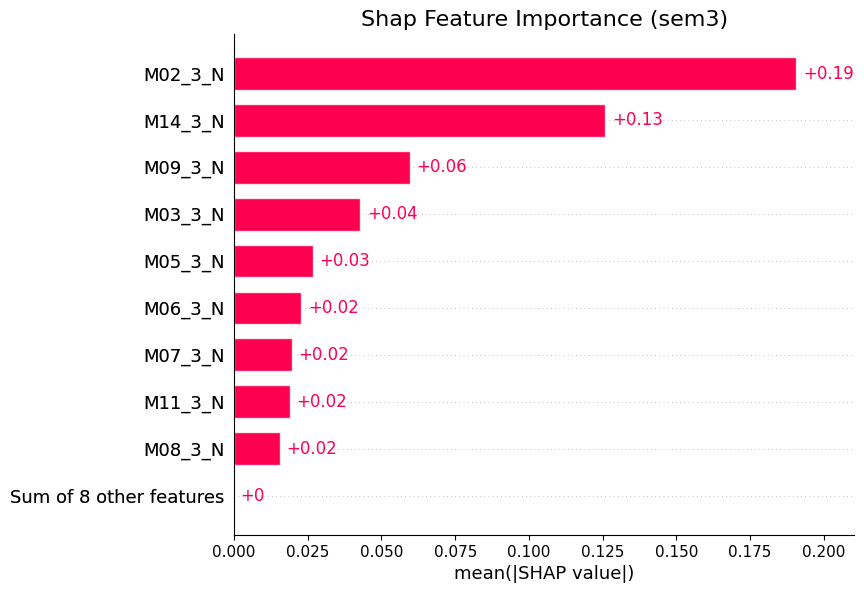

In [32]:
## Shap Global explainations
import shap
explainer3 = shap.TreeExplainer(models_3['model'], models_3['x_train'])
shap_values3 = explainer3(models_3['x_test'])

plt.title('Shap Feature Importance (sem3)', fontsize=16)
shap.plots.bar(shap_values3[..., 1])

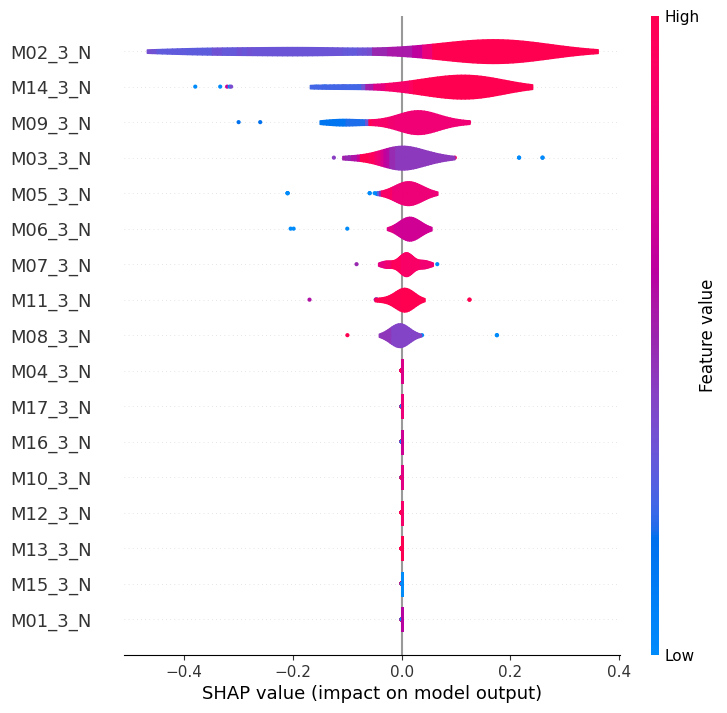

In [33]:
shap.plots.violin(shap_values3[..., 1], show=True)

In [34]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values3[..., 1], link='identity')

In [35]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=1, model_name='dt')

Student index 1 grades:
         grades
M01_3_N     5.1
M02_3_N     5.1
M03_3_N     1.7
M04_3_N     5.1
M05_3_N     1.7
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.000, Probability [1]: 1.000


In [36]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=4, model_name='dt')

Student index 4 grades:
         grades
M01_3_N     2.0
M02_3_N     2.7
M03_3_N     2.7
M04_3_N     5.1
M05_3_N     2.3
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     1.0
M09_3_N     5.1
M10_3_N     4.0
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     1.0
M15_3_N     5.1
M16_3_N     1.3
M17_3_N     5.1
Status: 0, Prediction: [0], Probability [0]: 0.652, Probability [1]: 0.348


In [37]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=14, model_name='dt')

Student index 14 grades:
         grades
M01_3_N     1.3
M02_3_N     5.1
M03_3_N     1.3
M04_3_N     2.3
M05_3_N     5.1
M06_3_N     1.0
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.000, Probability [1]: 1.000


In [38]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=24, model_name='dt')

Student index 24 grades:
         grades
M01_3_N     5.1
M02_3_N     5.1
M03_3_N     1.3
M04_3_N     5.1
M05_3_N     2.0
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     1.7
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 0, Prediction: [1], Probability [0]: 0.000, Probability [1]: 1.000
